In [2]:
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [13]:
# read in street lights data

light = pd.read_csv('streetLights.csv')
light = light[['the_geom']]
pattern = '\((.*)\)'

def extract_coords(given_string, split, lat_first = True):
    s = re.search(pattern, given_string).group(1)
    coords = s.split(split)
    if lat_first:
        return float(coords[0]), float(coords[1])
    return float(coords[1]), float(coords[0])

light['the_geom'] = light['the_geom'].apply(extract_coords, args = (' ', True))
display(light)

,the_geom
0,"(-122.26821599957998, 37.87128399880363)"
1,"(-122.30265000002592, 37.866183998981455)"
2,"(-122.2999940004867, 37.86619899899626)"
3,"(-122.27878899970369, 37.851656998801)"
4,"(-122.27850299961962, 37.8516959988152)"
...,...
7845,"(-122.26798345075954, 37.86805737715335)"
7846,"(-122.26760501250413, 37.86727425418809)"
7847,"(-122.27083867993001, 37.87174822490538)"
7848,"(-122.27057041972489, 37.87178162429782)"


In [14]:
# convert the dataframe to a geodataframe with a column of points

from shapely.geometry import Point

light['the_geom'] = light['the_geom'].apply(Point)
light_gdf = gpd.GeoDataFrame(
    light, geometry = 'the_geom', crs = 'EPSG:4326')
display(light_gdf)
display(light_gdf.crs)

,the_geom
0,POINT (-122.26822 37.87128)
1,POINT (-122.30265 37.86618)
2,POINT (-122.29999 37.86620)
3,POINT (-122.27879 37.85166)
4,POINT (-122.27850 37.85170)
...,...
7845,POINT (-122.26798 37.86806)
7846,POINT (-122.26761 37.86727)
7847,POINT (-122.27084 37.87175)
7848,POINT (-122.27057 37.87178)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
import contextily as cx

# alpha = opacity of dots; figsize = size of output
def plot_region(y_min, x_min, y_max, x_max, alpha = 0.3, figsize = 20): # x = longitude, y = latitude
    ax = light_gdf.plot(figsize=(figsize, figsize), alpha=alpha, edgecolor='k')
    ax.set_xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    cx.add_basemap(ax, crs=light_gdf.crs)

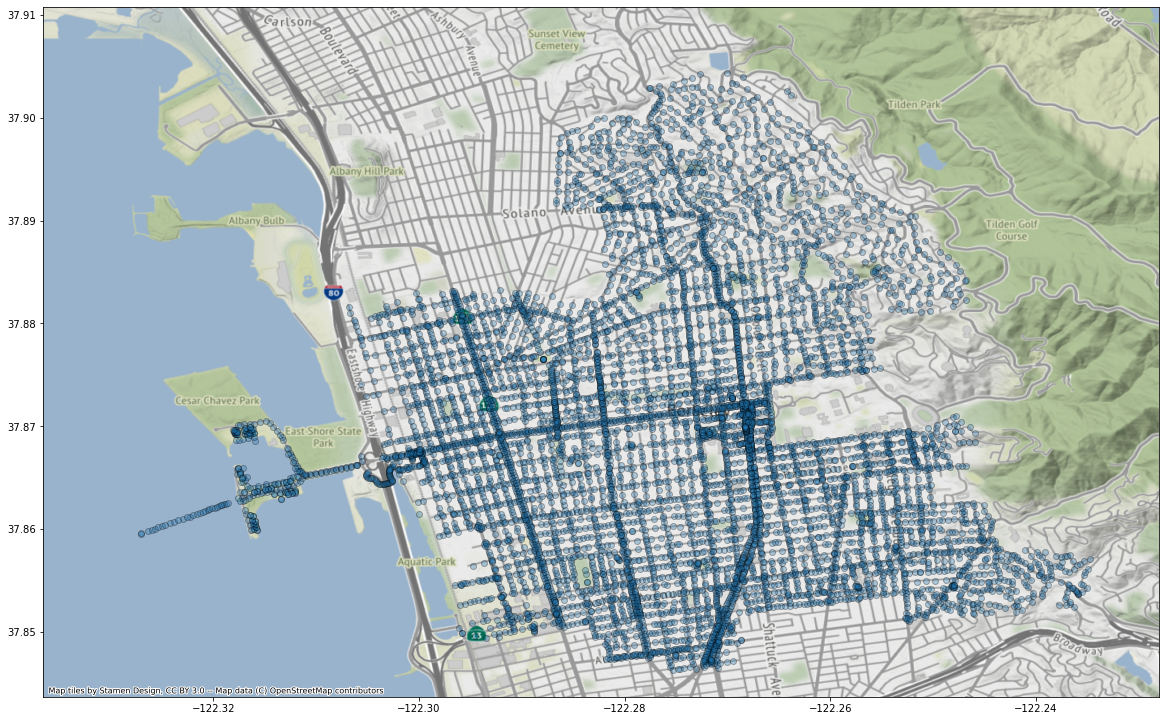

In [49]:
# entire city of berkeley
plot_region(37.84369, -122.33657, 37.91079, -122.22803)

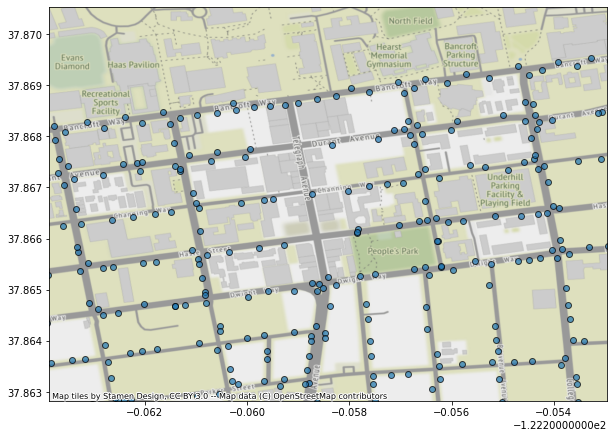

In [50]:
plot_region(37.8628258992577, -122.26386715387703, 37.87053645920996, -122.25295434030949, 0.7, 10)